# Import the necessary libraries

In [1]:
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                           
import seaborn as sns                                                    

from collections import Counter                                                 

import re, string, unicodedata                                                 
import contractions                                                             
from bs4 import BeautifulSoup                                                  

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator               
import nltk                                                                   
from nltk.corpus import stopwords                                              
from nltk.tokenize import word_tokenize, sent_tokenize                          
from nltk.stem.wordnet import WordNetLemmatizer                                
from nltk.stem.porter import PorterStemmer                                      

from sklearn.feature_extraction.text import CountVectorizer                    
from sklearn.feature_extraction.text import TfidfVectorizer                     

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier                             
from sklearn.metrics import classification_report                               
from sklearn.model_selection import cross_val_score 
# download stopwords
nltk.download('punkt')
nltk.download('wordnet')

C:\Users\shree\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded to 2 decimal places

Load the Dataset

In [3]:
tweets = pd.read_csv('tweets.csv')
tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.35,NaN,0.00,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.00,Customer Service Issue,1.00,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.00,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.00,Customer Service Issue,0.67,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


EDA

In [4]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
tweets.shape

(14640, 15)

In [6]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
tweets.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [9]:
np.sum(tweets.isnull().any(axis=1))

14638

In [10]:
print('Count of columns in the data is:  ', len(tweets.columns))
print('Count of rows in the data is:  ', len(tweets))

Count of columns in the data is:   15
Count of rows in the data is:   14640


In [11]:
# convert all columns with dtype object into category to save memory
for col in tweets.columns[ tweets.dtypes=='object']:
     tweets[col] =  tweets[col].astype('category')

In [12]:
# convert tweet_id into a category to save memory
tweets['tweet_id'] = tweets['tweet_id'].astype('category')

In [13]:
# convert tweet_created into a datetime to allow for time series analysis
tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created'])
tweets['tweet_created'] = tweets['tweet_created'].astype('datetime64[ns]')

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  category      
 1   airline_sentiment             14640 non-null  category      
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   category      
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  category      
 6   airline_sentiment_gold        40 non-null     category      
 7   name                          14640 non-null  category      
 8   negativereason_gold           32 non-null     category      
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  category      
 11  tweet_coord                 

Numerical variables

In [15]:
# show summary of all numerical variables
tweets.describe().T

,count,mean,std,min,25%,50%,75%,max
airline_sentiment_confidence,14640.00,0.90,0.16,0.34,0.69,1.00,1.00,1.00
negativereason_confidence,10522.00,0.64,0.33,0.00,0.36,0.67,1.00,1.00
retweet_count,14640.00,0.08,0.75,0.00,0.00,0.00,0.00,44.00


Categorical variables

In [16]:
# show summary of all categorical variables
tweets.describe(include=['category']).T

,count,unique,top,freq
tweet_id,14640,14485,570281470507352064,2
airline_sentiment,14640,3,negative,9178
negativereason,9178,10,Customer Service Issue,2910
airline,14640,6,United,3822
airline_sentiment_gold,40,3,negative,32
name,14640,7701,JetBlueNews,63
negativereason_gold,32,13,Customer Service Issue,12
text,14640,14427,@united thanks,6
tweet_coord,1019,832,"[0.0, 0.0]",164
tweet_location,9907,3081,"Boston, MA",157


Datetime variables

In [17]:
# show summary of datetime variable
tweets.describe(include=['datetime']).T

,count,unique,top,freq,first,last
tweet_created,14640,14247,2015-02-24 17:54:34,5,2015-02-17 07:36:05,2015-02-24 19:53:37


Number of tweets by day

In [18]:
# show number of tweets by day
by_date = tweets.groupby(pd.Grouper(key='tweet_created', axis=0, freq='D')).count()['tweet_id']
print(by_date)

tweet_created
2015-02-17     953
2015-02-18    1416
2015-02-19    1298
2015-02-20    1512
2015-02-21    1418
2015-02-22    2392
2015-02-23    3515
2015-02-24    2136
Freq: D, Name: tweet_id, dtype: int64


Data visualizations

In [19]:
# function to create labeled barplots

def labeled_barplot(data, feature, hue=None, perc=False, n=None):
    total = len(data[feature])  # length of the column
        
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette='viridis',
        order = data[feature].value_counts().index,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show() 

In [20]:
# import the figure size for the visualizations
from matplotlib import rcParams

Distribution of sentiment across all the tweets

In [21]:
# show number of tweets by sentiment
tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

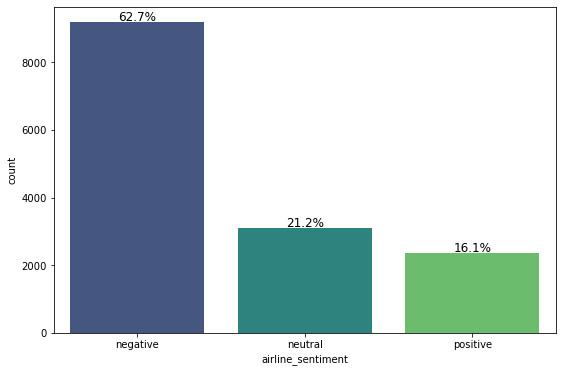

In [22]:
# create labled barplot for number of tweets by sentiment
rcParams['figure.figsize'] = 9,6
labeled_barplot(tweets,'airline_sentiment',perc=True)

Distribution of all tweets among each airline

In [23]:
# show number of tweets by airline
tweets.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

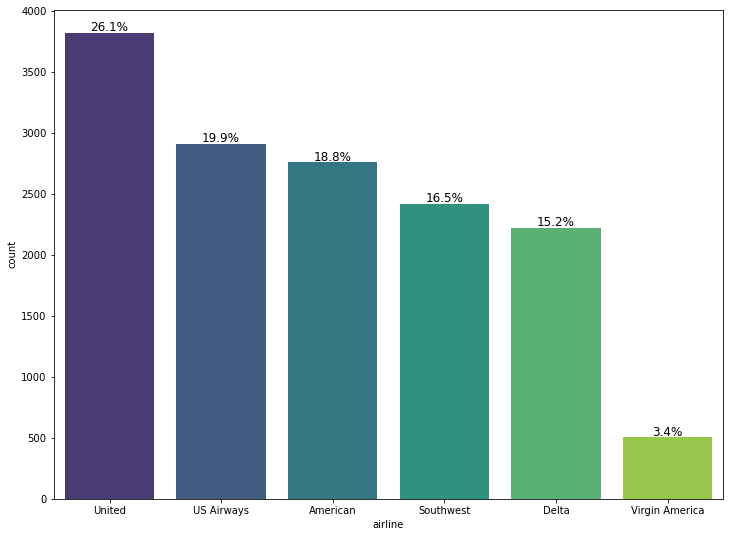

In [24]:
# create labeled barplot of number of tweets by airline
rcParams['figure.figsize'] = 12,9
labeled_barplot(tweets,'airline',perc=True)

Distribution of sentiment of tweets for each airline

In [25]:
# show number of tweets by sentiment per airline
tweets.groupby('airline')['airline_sentiment'].value_counts()

airline                 
American        negative    1960
                neutral      463
                positive     336
Delta           negative     955
                neutral      723
                positive     544
Southwest       negative    1186
                neutral      664
                positive     570
US Airways      negative    2263
                neutral      381
                positive     269
United          negative    2633
                neutral      697
                positive     492
Virgin America  negative     181
                neutral      171
                positive     152
Name: airline_sentiment, dtype: int64

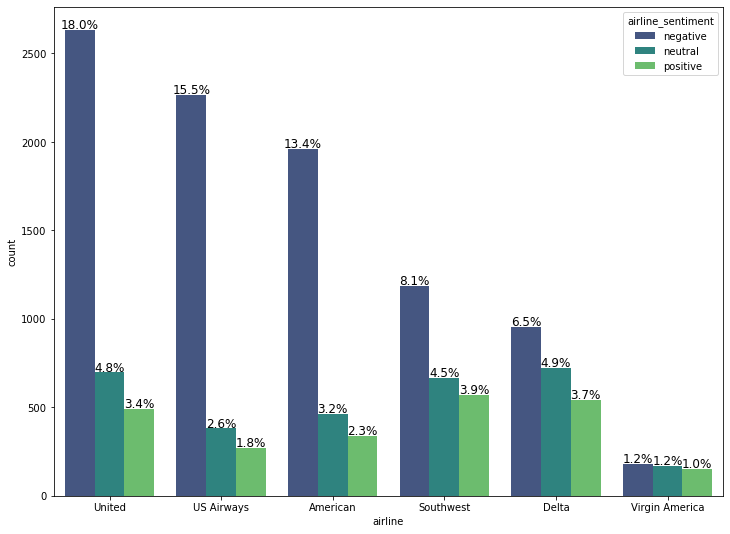

In [26]:
# create labeled barplot for number of tweets by sentiment per airline
labeled_barplot(tweets,'airline','airline_sentiment',perc=True)

Distribution of all the negative reasons

In [27]:
# show number of tweets by reason for negative sentiment
tweets.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

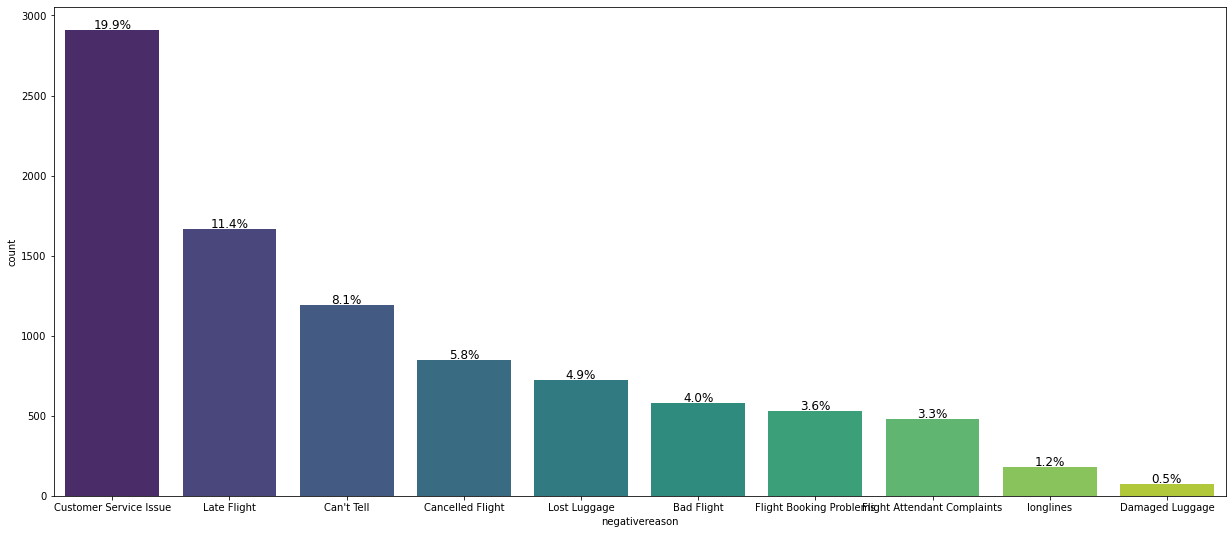

In [28]:
# create labeled barplot for number of tweets per reason for negative sentiment
rcParams['figure.figsize'] = 21,9
labeled_barplot(tweets,'negativereason',perc=True)

Word cloud of tweets of positive sentiment

In [29]:
def wordcloud(tweets):
  words = ' '.join(tweets['text'])
  cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

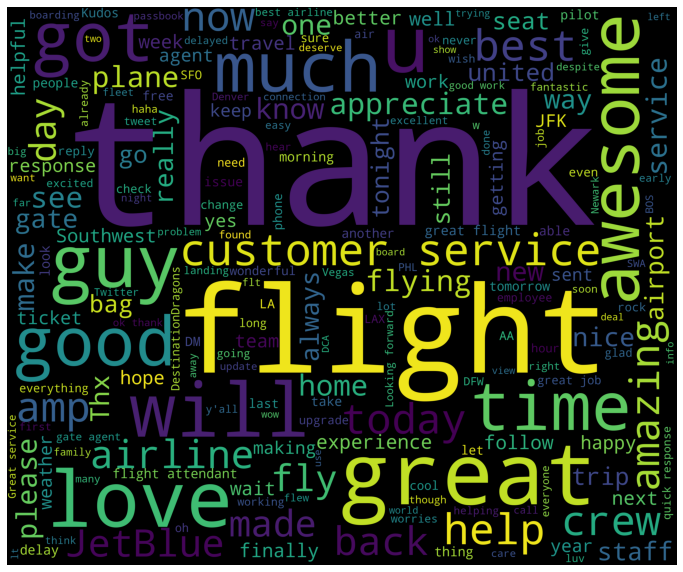

In [30]:
# create word cloud for positive tweets
pos_tweets = tweets[tweets['airline_sentiment']=='positive']
wordcloud(pos_tweets)

Word cloud of tweets of -ve sentiment

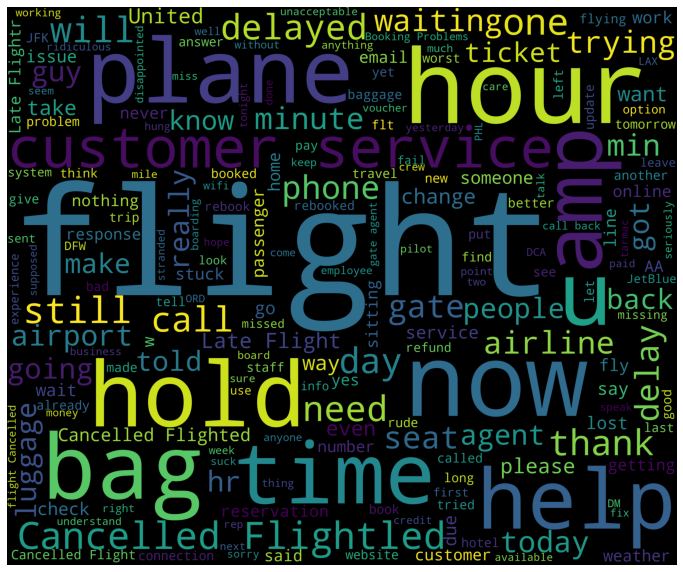

In [31]:
# create world cloud for negative tweets
neg_tweets = tweets[tweets['airline_sentiment']=='negative']
wordcloud(neg_tweets)

Follow-on data cleaning

In [32]:
column_list = tweets.columns.to_list()

In [33]:
# identify columns used for model building
columns = ['text','airline_sentiment']

In [34]:
# identify columns to be dropped
drop_columns = [col for col in column_list if col not in columns]
print(drop_columns)

['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


In [35]:
# drop all other columns except “text” and “airline_sentiment”
tweets_model = tweets.drop(columns = drop_columns)

In [36]:
# confirm new shape of the dataset
tweets_model.shape

(14640, 2)

In [37]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (non-turncated text column.)
#print head of new dataset
tweets_model.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


Data pre-processing

Clean text

In [38]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
tweets_model['text'] = tweets_model['text'].apply(lambda x: clean_text(x))
tweets_model.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you have added commercials to the experience... tacky.
2,neutral,I did not today... Must mean I need to take another trip!
3,negative,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,and it is a really big bad thing about it


Tokenization

In [39]:
tweets_model['text'] = tweets_model.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # tokenization of data
tweets_model.head()

,airline_sentiment,text
0,neutral,"[What, said, .]"
1,positive,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[and, it, is, a, really, big, bad, thing, about, it]"


Normalize text

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
stopwords = stopwords.words('english')
custom_remove_list = ['flight']
stopwords = list(set(stopwords)) + custom_remove_list
lemmatizer = WordNetLemmatizer()

# remove the non-ASCII characters
def remove_non_ascii(words):
    
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# remove the hashtags
def remove_hash(text):
   
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# remove the punctuations
def remove_punctuation(words):
    
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# remove the stop words
def remove_stopwords(words):
    
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tweets_model['text'] = tweets_model.apply(lambda row: normalize(row['text']), axis=1)
tweets_model.head()

,airline_sentiment,text
0,neutral,say
1,positive,plus add commercials experience tacky
2,neutral,today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests face little recourse
4,negative,really big bad thing


Supervised Learning

Bag of Words (Count Vectorizer)

In [42]:
# set independent variable for classification model
targets = sorted(tweets_model.airline_sentiment.unique().to_list())
print(targets)

['negative', 'neutral', 'positive']


In [43]:
# set the max number of features at 1000
count_vec = CountVectorizer(max_features=1000)
# convert text to numbers with CountVectorizer
data_features_count = count_vec.fit_transform(tweets_model['text'])
# convert the data features to array
data_features_count = data_features_count.toarray()  

In [44]:
# show shape of the feature vector
data_features_count.shape

(14640, 1000)

In [45]:
# split data into training and testing set
X_count = data_features_count
y = tweets_model.airline_sentiment
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.25, shuffle=False, random_state=42)

In [46]:
# find the optimal number of base learners using k-fold cross-validation (CV)
import numpy as np
base_ln = np.arange(100,400,100).tolist()

# train model with k-fold CV
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_count, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

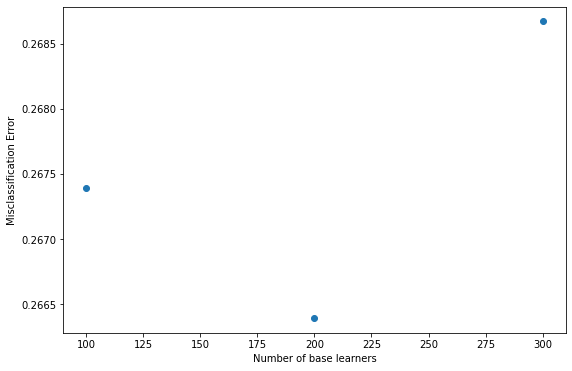

In [47]:
# set figure size
rcParams['figure.figsize'] = 9,6
# plot the error as k-fold increases
error = [1 - x for x in cv_scores]                                              # error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                             # optimal number of n_estimator selected by minimum error
plt.scatter(base_ln, error)                                                     # plot number of estimators with corresponding misclassification error
xy = (optimal_learners, min(error))
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [48]:
# train the best model
clf_count = RandomForestClassifier(n_estimators = optimal_learners, random_state=42)
clf_count.fit(X_train_count, y_train)
clf_count.score(X_test_count, y_test)
count_predicted = clf_count.predict(X_test_count)

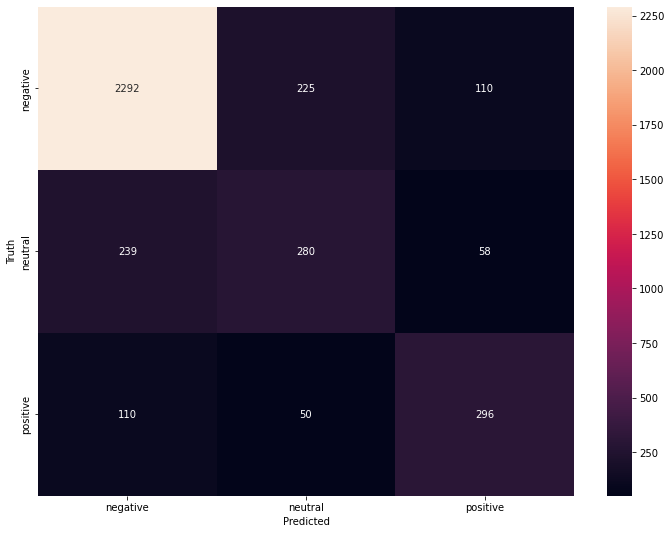

In [49]:
from sklearn.metrics import confusion_matrix
#create confusion matrix for Count Vectorizer
cm_count=confusion_matrix(y_test,count_predicted)

plt.figure(figsize=(12,9))
sns.heatmap(cm_count,annot=True,fmt='d',xticklabels=targets , yticklabels= targets)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [50]:
all_features_count = count_vec.get_feature_names()                              # instantiate the features from the vectorizer
top_features_count=''                                                           # addition of top 40 features into top_feature after training the model
feat=clf_count.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features_count+=all_features_count[i]
    top_features_count+=', '
    
top_features_count

'thank, delay, great, love, hours, hold, awesome, bag, cancel, get, hour, amaze, best, wait, fly, would, please, worst, customer, plane, fleek, time, call, service, help, lose, make, go, never, late, need, still, say, flight, miss, try, luggage, tell, one, airline, '

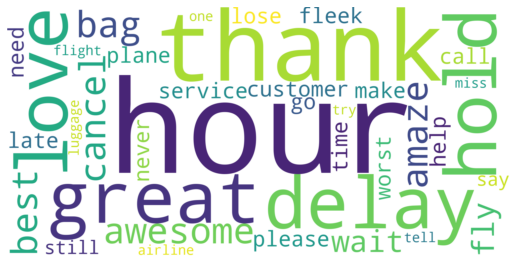

In [51]:
from wordcloud import WordCloud
# create word cloud
wordcloud_count = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features_count)

# show word cloud
plt.imshow(wordcloud_count, interpolation='bilinear')
plt.figure(1, figsize=(15, 12), frameon='equal')
plt.axis("off")
plt.show()

In [52]:
# saving variables for model
y_train_count = y_train
y_test_count = y_test

Tf-Idf Vectorizer.

In [53]:
# set the max number of features at 1000
tfidf_vec = TfidfVectorizer(max_features=1000)
# convert test to numbers with TfidfVectorizer
data_features_idf = tfidf_vec.fit_transform(tweets_model['text'])
# convert the data features to array
data_features_idf = data_features_idf.toarray()           

In [54]:
# show shape of the feature vector
data_features_idf.shape

(14640, 1000)

In [55]:
# split data into training and testing set
X_idf = data_features_idf
y = tweets_model.airline_sentiment
X_train_idf, X_test_idf, y_train, y_test = train_test_split(X_idf, y, test_size=0.25, shuffle=False, random_state=42)

In [56]:
# find the optimal number of base learners using k-fold cross-validation (CV)
base_ln = np.arange(100,400,100).tolist()

# train model with k-fold CV
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_idf, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

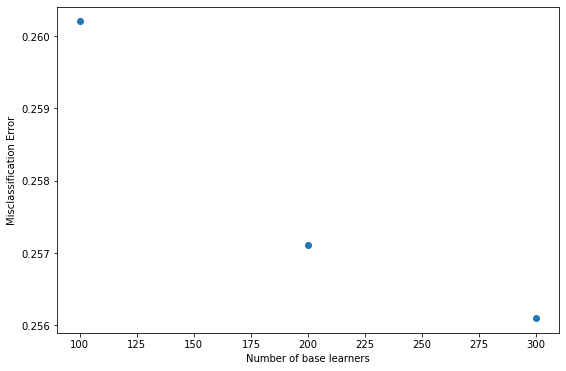

In [57]:
# plot the error as k-fold increases
error = [1 - x for x in cv_scores]                                              # error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                             # optimal number of n_estimator selected by minimum error
plt.scatter(base_ln, error)                                                     # plot number of estimators with corresponding misclassification error
xy = (optimal_learners, min(error))
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [58]:
# train the best model
clf = RandomForestClassifier(n_estimators = optimal_learners, random_state=42)
clf.fit(X_train_idf, y_train)
clf.score(X_test_idf, y_test)
tf_idf_predicted = clf.predict(X_test_idf)

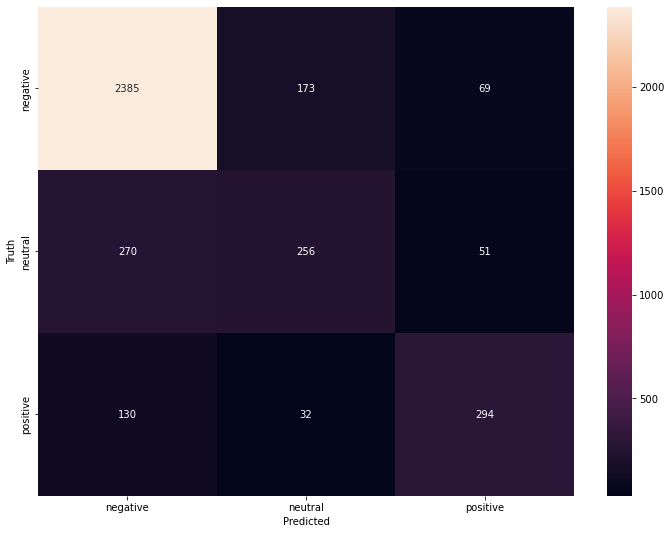

In [59]:
# create confusion matrix for TF-IDF Vectorizer
cm_tfidf=confusion_matrix(y_test , tf_idf_predicted)

plt.figure(figsize=(12,9))
sns.heatmap(cm_tfidf,annot=True,fmt='d',xticklabels=targets , yticklabels=targets)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [60]:
all_features = tfidf_vec.get_feature_names()                                    # instantiate the features from the vectorizer
top_features=''                                                                 # addition of top 40 features into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '

top_features 

'thank, delay, great, love, hours, cancel, hold, get, awesome, bag, best, hour, fly, amaze, please, wait, fleek, service, time, fleet, would, make, plane, follow, call, customer, flight, good, need, help, dm, worst, know, go, airline, say, lose, never, still, late, '

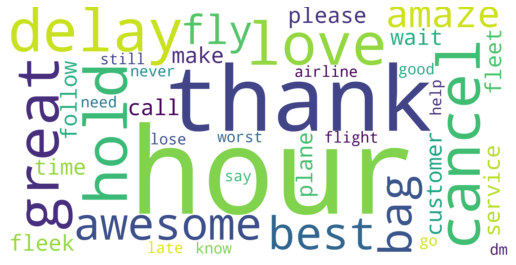

In [61]:
from wordcloud import WordCloud
# create word cloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# show word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(15, 12), frameon='equal')
plt.axis("off")
plt.show()

In [62]:
# saving variables for model
y_train_idf = y_train
y_test_idf = y_test

Recurring Neural Network

In [63]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import LabelEncoder

In [64]:
text_corpus = tweets_model.text
labels_corpus = tweets_model.airline_sentiment

X_train, X_test, y_train, y_test = train_test_split(text_corpus, labels_corpus, test_size=0.25, random_state=42)

In [65]:
# set hyperparameters
num_words=4000
maxlen=1000

In [66]:
# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=num_words, char_level=False)

tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

len(sequences_train)

10980

In [67]:
# pad sequences with 0s
X_train = pad_sequences(sequences_train, maxlen=maxlen)
X_test = pad_sequences(sequences_test, maxlen=maxlen)

print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)
print(type(X_train))

Shape of data tensor: (10980, 1000)
Shape of data test tensor: (3660, 1000)
<class 'numpy.ndarray'>


In [68]:
# encode target variable
label_encoder = LabelEncoder() 
y_train_label = label_encoder.fit_transform(y_train)
y_test_label = label_encoder.fit_transform(y_test)

Defining the model

In [69]:
from keras import backend
import tensorflow as tf
backend.clear_session()

# set the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [70]:
def create_model(maxlen,num_words,num_categories):
    
    model = Sequential()
    
    model.add(Embedding(num_words,output_dim=100,input_length=maxlen,trainable=True))
    
    model.add(BatchNormalization())
    
    model.add(Bidirectional(LSTM(100)))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(128,activation='relu'))
    
    model.add(BatchNormalization())

    model.add(Dense(64,activation='relu'))
    
    model.add(Dropout(0.2))

    model.add(Dense(32,activation='relu'))
    
    model.add(Dense(num_categories, activation='softmax'))
              
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    return model

In [72]:
model=create_model(maxlen,num_words,tweets_model.airline_sentiment.nunique())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         400000    
                                                                 
 batch_normalization (Batch  (None, 1000, 100)         400       
 Normalization)                                                  
                                                                 
 bidirectional (Bidirection  (None, 200)               160800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               5

In [73]:
history = model.fit(X_train, y_train_label, epochs=5, validation_split=0.25)

Epoch 1/5
258/258 [==============================] - 512s 2s/step - loss: 0.7675 - accuracy: 0.6850 - val_loss: 1.0092 - val_accuracy: 0.3665
Epoch 2/5
258/258 [==============================] - 504s 2s/step - loss: 0.5277 - accuracy: 0.7877 - val_loss: 0.6248 - val_accuracy: 0.7359
Epoch 3/5
258/258 [==============================] - 500s 2s/step - loss: 0.3938 - accuracy: 0.8493 - val_loss: 0.6351 - val_accuracy: 0.7468
Epoch 4/5
258/258 [==============================] - 499s 2s/step - loss: 0.2984 - accuracy: 0.8939 - val_loss: 0.7614 - val_accuracy: 0.7508
Epoch 5/5
258/258 [==============================] - 495s 2s/step - loss: 0.2403 - accuracy: 0.9162 - val_loss: 0.9640 - val_accuracy: 0.7177


Model evaluation on training data

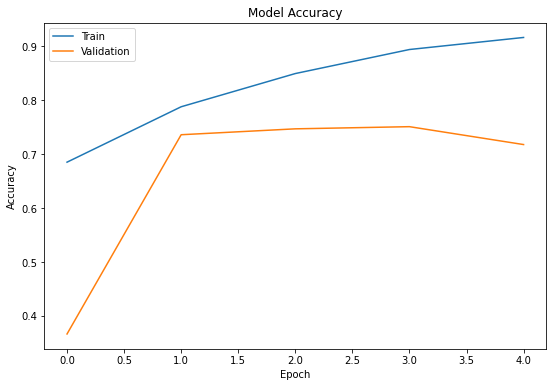

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [75]:
#creating a dictionary to map model predictions to each sentiment
class_dict = {0:'negative',
 1:'neutral',
 2:'positive'}

In [76]:
#making predictions on the test data
y_pred_test = model.predict(X_test)

#converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

#calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

115/115 [==============================] - 45s 380ms/step


In [77]:
#creating a dataframe of model predictions
tweets = pd.DataFrame({"Labels":y_pred_test_classes})

#replacing predictions with sentiments
label_tweets = tweets.replace({"Labels":class_dict})

#converting dataframe to array
y_pred_test_classes = label_tweets.to_numpy()

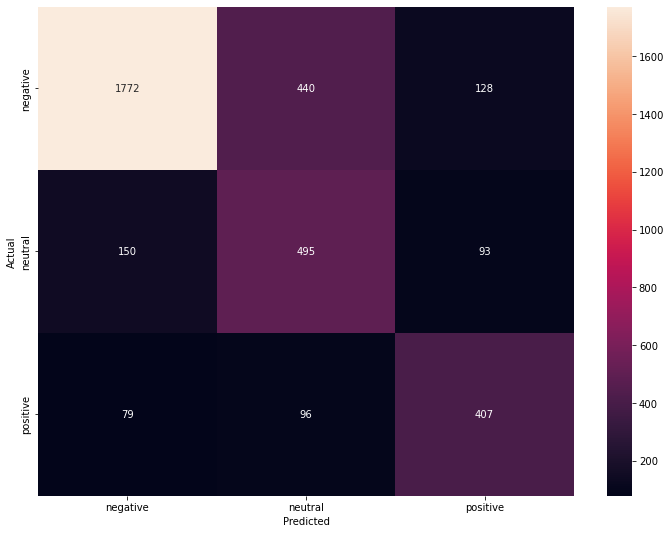

In [78]:
#plotting the heatmap using confusion matrix
cm_rnn = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(12,9))
sns.heatmap(cm_rnn, annot=True,  fmt='.0f', xticklabels=targets, yticklabels=targets)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Conclusion

In [79]:
# provide a classification report on the Count Vectorizer model
print("Random Forest model trained with Count Vectorizer data")
print(" ")
print(classification_report(y_test_count , count_predicted, target_names = targets))
print(" ")

# provide a classification report on the TF-IDF Vectorizer model
print("Random Forest model trained with TF-IDF Vectorizer data")
print(" ")
print(classification_report(y_test_idf , tf_idf_predicted, target_names = targets))
print(" ")

# provide the classification report on the RNN model
print("Recurring Neural Network (RNN) model")
print(" ")
print(classification_report(y_test, y_pred_test_classes))

Random Forest model trained with Count Vectorizer data
 
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      2627
     neutral       0.50      0.49      0.49       577
    positive       0.64      0.65      0.64       456

    accuracy                           0.78      3660
   macro avg       0.67      0.67      0.67      3660
weighted avg       0.78      0.78      0.78      3660

 
Random Forest model trained with TF-IDF Vectorizer data
 
              precision    recall  f1-score   support

    negative       0.86      0.91      0.88      2627
     neutral       0.56      0.44      0.49       577
    positive       0.71      0.64      0.68       456

    accuracy                           0.80      3660
   macro avg       0.71      0.67      0.68      3660
weighted avg       0.79      0.80      0.79      3660

 
Recurring Neural Network (RNN) model
 
              precision    recall  f1-score   support

    negative       0.89  